In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('dataset.csv')
data.head() 


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500


In [4]:
data.shape

(112634, 17)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   County                                             112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  int64  
 5   Model Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112614 non-null  object 
 8   Electric Vehicle Type                              112634 non-null  object

In [6]:
data.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [7]:
# adjusting the dataset's column names
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')

In [8]:
data.columns

Index(['vin_(1-10)', 'county', 'city', 'state', 'postal_code', 'model_year',
       'make', 'model', 'electric_vehicle_type',
       'clean_alternative_fuel_vehicle_(cafv)_eligibility', 'electric_range',
       'base_msrp', 'legislative_district', 'dol_vehicle_id',
       'vehicle_location', 'electric_utility', '2020_census_tract'],
      dtype='object')

In [9]:
# Checking for the null values in the dataset
data.isnull().sum().sort_values(ascending=False)/data.shape[0]*100

electric_utility                                     0.393309
legislative_district                                 0.253920
vehicle_location                                     0.021308
model                                                0.017757
vin_(1-10)                                           0.000000
postal_code                                          0.000000
county                                               0.000000
state                                                0.000000
city                                                 0.000000
electric_vehicle_type                                0.000000
make                                                 0.000000
model_year                                           0.000000
clean_alternative_fuel_vehicle_(cafv)_eligibility    0.000000
base_msrp                                            0.000000
electric_range                                       0.000000
dol_vehicle_id                                       0.000000
2020_cen

Percentage of the null values in the columns, with respect to the entire records in the dataset is significantly very low. Hence removing the records with null values.

In [10]:
data.dropna(axis=0, inplace=True)

In [11]:
data.isnull().sum()

vin_(1-10)                                           0
county                                               0
city                                                 0
state                                                0
postal_code                                          0
model_year                                           0
make                                                 0
model                                                0
electric_vehicle_type                                0
clean_alternative_fuel_vehicle_(cafv)_eligibility    0
electric_range                                       0
base_msrp                                            0
legislative_district                                 0
dol_vehicle_id                                       0
vehicle_location                                     0
electric_utility                                     0
2020_census_tract                                    0
dtype: int64

In [12]:
# Checking, if there are any duplicate rows in the dataset
print("There are {} duplicate entries in the datset".format(data.duplicated().sum()))


There are 0 duplicate entries in the datset


In [13]:
data['postal_code'] = data['postal_code'].astype('object')

In [14]:
data['postal_code'].dtype

dtype('O')

In [15]:
data['model_year'] = data['model_year'].astype('object')
data.model_year.dtype

dtype('O')

postal_code and model_year features are more suited to be categorical than numerical, hence changed the data type of both the features to 'object'

In [16]:
data['electric_range'].value_counts(normalize=True)*100

electric_range
0      34.860725
215     5.601327
84      3.662886
220     3.577288
238     3.085990
         ...    
74      0.002675
95      0.001783
57      0.000892
39      0.000892
59      0.000892
Name: proportion, Length: 101, dtype: float64

In [17]:
data['electric_range'].describe()

count    112152.000000
mean         87.829651
std         102.336645
min           0.000000
25%           0.000000
50%          32.000000
75%         208.000000
max         337.000000
Name: electric_range, dtype: float64

In [ ]:
electric_range_nonzero_median = data[data['electric_range'] > 0]['electric_range'].median()
electric_range_nonzero_median

np.float64(103.0)

In [19]:
data['electric_range'].replace(to_replace=0, value=electric_range_nonzero_median, inplace=True)

In [20]:
data['electric_range'].describe()

count    112152.000000
mean        123.736197
std          81.083472
min           6.000000
25%          75.000000
50%         103.000000
75%         208.000000
max         337.000000
Name: electric_range, dtype: float64

<Axes: ylabel='electric_range'>

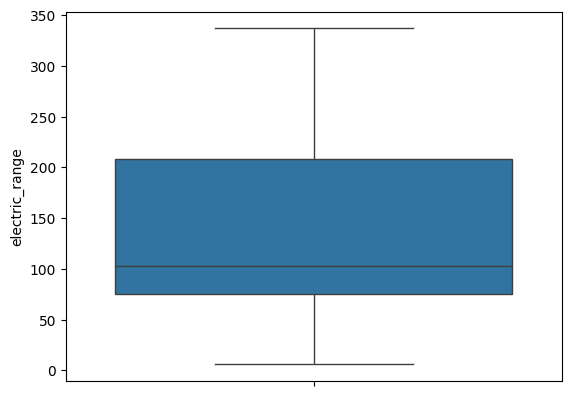

In [21]:
sns.boxplot(data['electric_range'])

Since more than 34% of the values are 0, it doesn't make any sense to have 0 as the electric range for an electric vehicle.
Replaced the 0 with non-zero median

In [22]:
data['base_msrp'].describe()

count    112152.000000
mean       1793.882320
std       10785.259118
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      845000.000000
Name: base_msrp, dtype: float64

In [23]:
data['base_msrp'].value_counts(normalize=True)*100

base_msrp
0         96.881019
69900      1.331229
31950      0.362009
52900      0.189921
32250      0.140880
54950      0.120372
59900      0.119481
39995      0.105214
36900      0.089165
44100      0.084706
64950      0.073115
33950      0.069548
45600      0.067765
52650      0.059740
34995      0.051716
36800      0.044582
55700      0.041907
53400      0.024966
110950     0.021400
98950      0.020508
81100      0.016941
102000     0.016941
90700      0.016050
75095      0.014266
184400     0.010700
43700      0.008916
89100      0.006242
109000     0.006242
91250      0.003567
845000     0.000892
Name: proportion, dtype: float64

In [24]:
data[data['base_msrp'] > 0]['base_msrp'].value_counts(normalize=True)*100

base_msrp
69900     42.681532
31950     11.606632
52900      6.089194
32250      4.516867
54950      3.859348
59900      3.830760
39995      3.373356
36900      2.858776
44100      2.715838
64950      2.344197
33950      2.229846
45600      2.172670
52650      1.915380
34995      1.658090
36800      1.429388
55700      1.343625
53400      0.800457
110950     0.686106
98950      0.657519
81100      0.543168
102000     0.543168
90700      0.514580
75095      0.457404
184400     0.343053
43700      0.285878
89100      0.200114
109000     0.200114
91250      0.114351
845000     0.028588
Name: proportion, dtype: float64

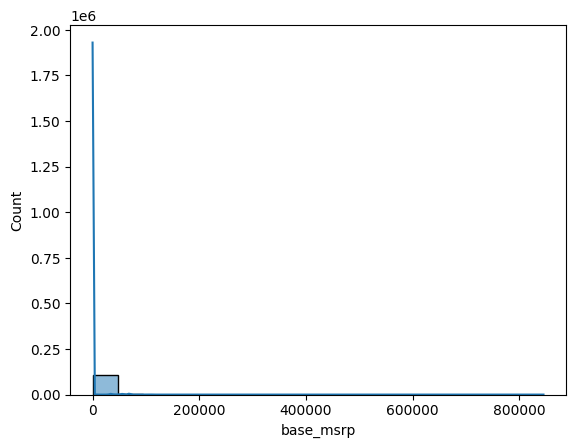

count    112152.000000
mean       1793.882320
std       10785.259118
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      845000.000000
Name: base_msrp, dtype: float64


In [25]:
sns.histplot(data['base_msrp'], kde=True)
plt.show()

print(data['base_msrp'].describe())

<Axes: ylabel='base_msrp'>

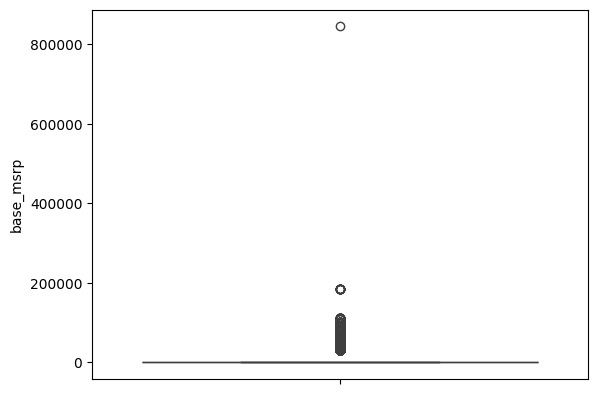

In [26]:
sns.boxplot(data['base_msrp'])

In [27]:
#Deleting the base_msrp feature as 97% of the values are 0
data.drop(columns='base_msrp', axis=1, inplace = True)

My justification to drop the base_msrp feature is, even if those values are replaced by mean or median or any other statistic. There will be no variablity in the data, as the percentage of the values which need to be replaced is very high.

In [28]:
np.sort(data['legislative_district'].unique())

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49.])

In [29]:
# Converting data type to object
data['legislative_district'] = data['legislative_district'].astype('object')
data['legislative_district'].dtype

dtype('O')

In [30]:
# No duplicate values in vehicle_id
data['dol_vehicle_id'].duplicated().sum()

np.int64(0)

In [31]:
data['2020_census_tract'].value_counts()

2020_census_tract
53033028500    583
53033032321    550
53033007800    418
53033024100    401
53033005600    394
              ... 
53001950302      1
53075000100      1
53077001300      1
53021980100      1
53021020403      1
Name: count, Length: 1760, dtype: int64

In [32]:
# Converting the datatype to object 
data['2020_census_tract'] = data['2020_census_tract'].astype('object')
data['2020_census_tract'].dtype

dtype('O')

In [33]:
data.columns

Index(['vin_(1-10)', 'county', 'city', 'state', 'postal_code', 'model_year',
       'make', 'model', 'electric_vehicle_type',
       'clean_alternative_fuel_vehicle_(cafv)_eligibility', 'electric_range',
       'legislative_district', 'dol_vehicle_id', 'vehicle_location',
       'electric_utility', '2020_census_tract'],
      dtype='object')

In [34]:
data['coordinates'] = data['vehicle_location'].str.removeprefix('POINT ').str.removeprefix('(').str.removesuffix(')').str.split(' ')

In [35]:
data['latitude'] = data['coordinates'].apply(lambda x : x[0])
data['longitude'] = data['coordinates'].apply(lambda x : x[1])

In [36]:
data['latitude'].value_counts()

latitude
-122.13158    2914
-122.2066     2059
-122.1872     2001
-122.31765    1878
-122.12096    1851
              ... 
-117.97378       1
-122.86239       1
-122.13017       1
-119.99854       1
-117.08742       1
Name: count, Length: 516, dtype: int64

In [37]:
data['longitude'].value_counts()

longitude
47.67858    2914
47.67887    2059
47.61001    2001
47.70013    1878
47.55584    1851
            ... 
47.30036       1
46.07142       1
46.53072       1
46.21092       1
46.53906       1
Name: count, Length: 516, dtype: int64

Univariate Analysis

Non_visual Univariate Analysis

In [38]:
numerical_df = data.select_dtypes(include=['int64', 'float64'])
numerical_df.head()

,electric_range,dol_vehicle_id
2,73,218972519
3,238,186750406
4,26,2006714
5,215,475635324
6,75,253546023


In [39]:
# numerical_univariate_analysis function
def numerical_univariate_analysis(num_df):
    for column_name in num_df:
        print("*"*10, column_name, "*"*10)
        print(num_df[column_name].describe())
        print()

In [40]:
numerical_univariate_analysis(numerical_df)

********** electric_range **********
count    112152.000000
mean        123.736197
std          81.083472
min           6.000000
25%          75.000000
50%         103.000000
75%         208.000000
max         337.000000
Name: electric_range, dtype: float64

********** dol_vehicle_id **********
count    1.121520e+05
mean     1.994712e+08
std      9.401842e+07
min      4.777000e+03
25%      1.484164e+08
50%      1.923916e+08
75%      2.191885e+08
max      4.792548e+08
Name: dol_vehicle_id, dtype: float64



In [41]:
data.select_dtypes(include='object').columns

Index(['vin_(1-10)', 'county', 'city', 'state', 'postal_code', 'model_year',
       'make', 'model', 'electric_vehicle_type',
       'clean_alternative_fuel_vehicle_(cafv)_eligibility',
       'legislative_district', 'vehicle_location', 'electric_utility',
       '2020_census_tract', 'coordinates', 'latitude', 'longitude'],
      dtype='object')

In [42]:
discrete_columns = ['vin_(1-10)', 'county', 'city', 'state', 'postal_code', 'model_year',
       'make', 'model', 'electric_vehicle_type',
       'clean_alternative_fuel_vehicle_(cafv)_eligibility',
       'legislative_district', 'electric_utility',
       '2020_census_tract']

In [43]:
discrete_df = data[discrete_columns]
discrete_df.head()

,vin_(1-10),county,city,state,postal_code,model_year,make,model,electric_vehicle_type,clean_alternative_fuel_vehicle_(cafv)_eligibility,legislative_district,electric_utility,2020_census_tract
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,15.0,PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,39.0,PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,38.0,PUGET SOUND ENERGY INC,53061041500
5,5YJ3E1EB5J,Snohomish,Bothell,WA,98021,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,1.0,PUGET SOUND ENERGY INC,53061051916
6,1N4AZ0CP4D,Snohomish,Everett,WA,98203,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,38.0,PUGET SOUND ENERGY INC,53061040900


In [44]:
# discrete_univariate_analysis function

def discrete_univariate_analysis(discrete_df):
    for column_name in discrete_df:
        print("*"*10, column_name, "*"*10)
        print(discrete_df[column_name].agg(['count', 'nunique', 'unique']))
        print('Value Counts: \n', discrete_df[column_name].value_counts())
        print()

In [45]:
discrete_univariate_analysis(discrete_df)

********** vin_(1-10) **********
count                                                 112152
nunique                                                 7522
unique     [JN1AZ0CP8B, 1G1FW6S08H, 3FA6P0SU1K, 5YJ3E1EB5...
Name: vin_(1-10), dtype: object
Value Counts: 
 vin_(1-10)
5YJYGDEE9M    471
5YJYGDEE0M    463
5YJYGDEE7M    447
5YJYGDEE8M    446
5YJYGDEE2M    435
             ... 
WBA5P9C03M      1
YV4BR0CMXL      1
WA12AAGE0N      1
1G1RD6S58K      1
WA132BFZ9N      1
Name: count, Length: 7522, dtype: int64

********** county **********
count                                                 112152
nunique                                                   39
unique     [Yakima, Skagit, Snohomish, Island, Thurston, ...
Name: county, dtype: object
Value Counts: 
 county
King            58980
Snohomish       12412
Pierce           8525
Clark            6681
Thurston         4109
Kitsap           3828
Whatcom          2839
Spokane          2785
Benton           1376
Island           1298
Ska

Univariate - Visual Analysis

1. Distribution of Electric Range

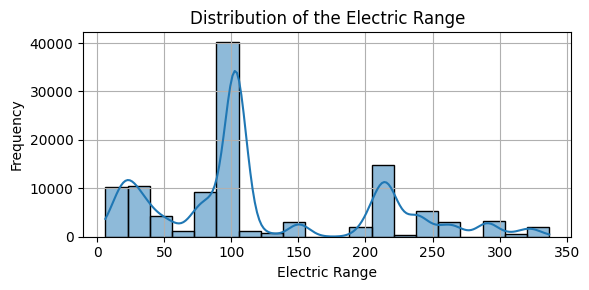

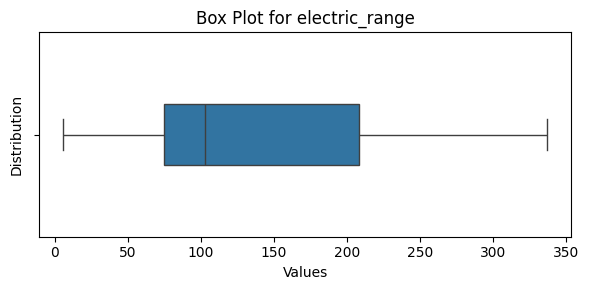

In [46]:
# Hiatogram
plt.figure(figsize=(6,3))
sns.histplot(data['electric_range'],bins=20, kde=True,edgecolor='black')
plt.title('Distribution of the Electric Range')
plt.xlabel('Electric Range')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

# Box Plot
plt.figure(figsize=(6, 3))
sns.boxplot(x = data['electric_range'], width=0.3, fliersize=5)
plt.title('Box Plot for electric_range')
plt.xlabel('Values')
plt.ylabel('Distribution')
plt.tight_layout()
plt.show()

There are no outliers observed in the electric range column. NOt many vehicles have more range.

2. Top 10 Counties W.R.T number of electric vehicles

In [47]:
top_10_counties = data['county'].value_counts().head(10)
top_10_counties

county
King         58980
Snohomish    12412
Pierce        8525
Clark         6681
Thurston      4109
Kitsap        3828
Whatcom       2839
Spokane       2785
Benton        1376
Island        1298
Name: count, dtype: int64

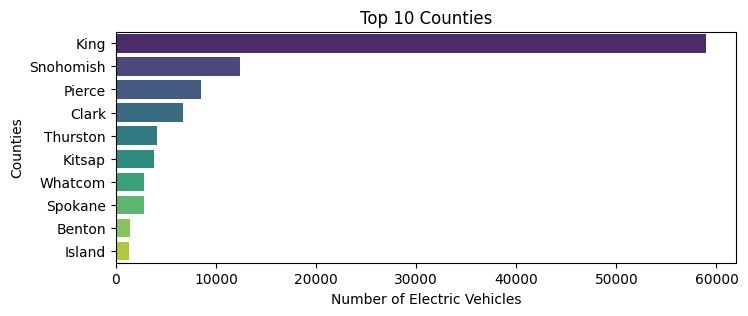

In [48]:
plt.figure(figsize=(8,3))
sns.barplot(x=top_10_counties.values, y=top_10_counties.index, palette='viridis')
plt.title("Top 10 Counties")
plt.xlabel("Number of Electric Vehicles")
plt.ylabel("Counties")
plt.show()

It can be observed that 'King' is top county having more number of electric vehicles, followed by Snohomish and Pierce. 10th county is ISland

3. Top 10 Cities

In [49]:
top_10_cities = data['city'].value_counts().head(10)
top_10_cities

city
Seattle      20295
Bellevue      5919
Redmond       4199
Vancouver     4013
Kirkland      3598
Bothell       3334
Sammamish     3291
Renton        2777
Olympia       2729
Tacoma        2375
Name: count, dtype: int64

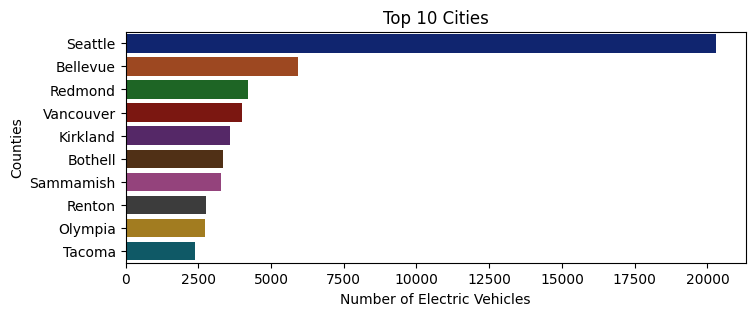

In [50]:
plt.figure(figsize=(8,3))
sns.barplot(x=top_10_cities.values, y=top_10_cities.index, palette='dark')
plt.title("Top 10 Cities")
plt.xlabel("Number of Electric Vehicles")
plt.ylabel("Counties")
plt.show()

'Seattle' is top city having more number of electric vehicles, followed by Bellevue and Redmond. 10th county is Tacoma

4. Model Year

In [51]:
model_year = data['model_year'].value_counts()
model_year

model_year
2022    26455
2021    18277
2018    14190
2020    10998
2019    10216
2017     8598
2016     5709
2015     4918
2013     4669
2014     3665
2023     1863
2012     1695
2011      835
2010       24
2008       23
2000       10
1999        3
2002        2
1997        1
1998        1
Name: count, dtype: int64

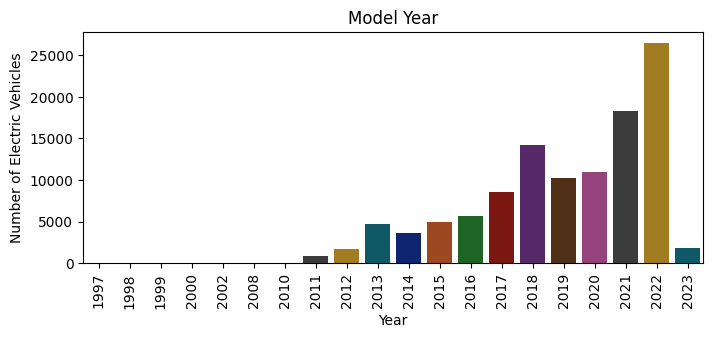

In [52]:
plt.figure(figsize=(8,3))
sns.barplot(model_year, palette='dark')
plt.title("Model Year")
plt.xlabel("Year")
plt.ylabel("Number of Electric Vehicles")
plt.xticks(rotation=90)
plt.show()

More Electric vehicles have been manufactures in 2022, followed by 2021 and 2018. Least being 2011. Significant increase in the manufacturing of the electric vehicles can be observed over the years.

5. Top 5 Models

In [53]:
top5_models = data['model'].value_counts().head(5)
top5_models

model
MODEL 3    23042
MODEL Y    17086
LEAF       12846
MODEL S     7346
BOLT EV     4895
Name: count, dtype: int64

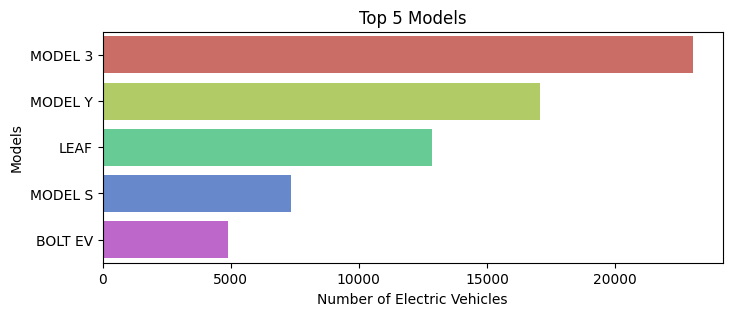

In [54]:
plt.figure(figsize=(8,3))
sns.barplot(x=top5_models.values, y=top5_models.index, palette='hls')
plt.title("Top 5 Models")
plt.xlabel("Number of Electric Vehicles")
plt.ylabel("Models")
plt.show()

There more Model 3 electric vehicles followed by Model Y in top 5.

6. Top 10 makers

In [55]:
top_10_makers = data['make'].value_counts().head(10)
top_10_makers

make
TESLA         51883
NISSAN        12846
CHEVROLET     10140
FORD           5780
BMW            4660
KIA            4469
TOYOTA         4368
VOLKSWAGEN     2507
AUDI           2320
VOLVO          2256
Name: count, dtype: int64

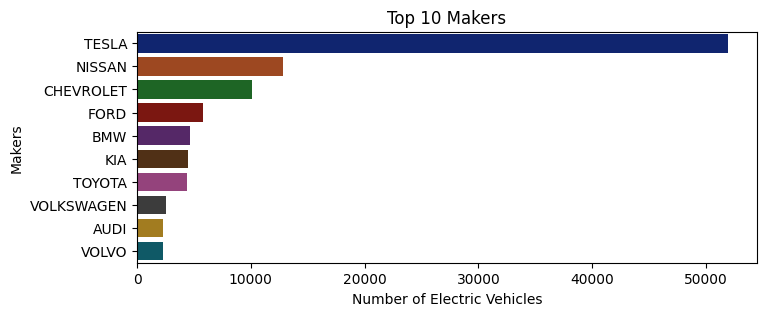

In [56]:
plt.figure(figsize=(8,3))
sns.barplot(x=top_10_makers.values, y=top_10_makers.index, palette='dark')
plt.title("Top 10 Makers")
plt.xlabel("Number of Electric Vehicles")
plt.ylabel("Makers")
plt.show()

Telsa makes, highest number of electric vehicles followed by Nissan and 10th being Volvo

7. Electric Vehicle Type

In [57]:
data['electric_vehicle_type'].value_counts(normalize=True)

electric_vehicle_type
Battery Electric Vehicle (BEV)            0.764427
Plug-in Hybrid Electric Vehicle (PHEV)    0.235573
Name: proportion, dtype: float64

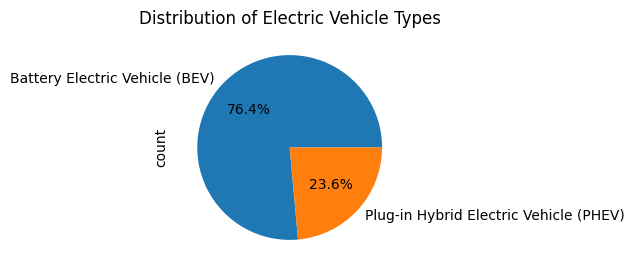

In [58]:
plt.figure(figsize=(6,3))
data['electric_vehicle_type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Electric Vehicle Types')
plt.show()

There Seems to be more Battery Vehicles than Hybrid vehicles in the market.

8. Clean Alternative Fuel Vehicle(cafv) Eligibility

In [59]:
data['clean_alternative_fuel_vehicle_(cafv)_eligibility'].value_counts(normalize=True)*100

clean_alternative_fuel_vehicle_(cafv)_eligibility
Clean Alternative Fuel Vehicle Eligible                         52.067730
Eligibility unknown as battery range has not been researched    34.860725
Not eligible due to low battery range                           13.071546
Name: proportion, dtype: float64

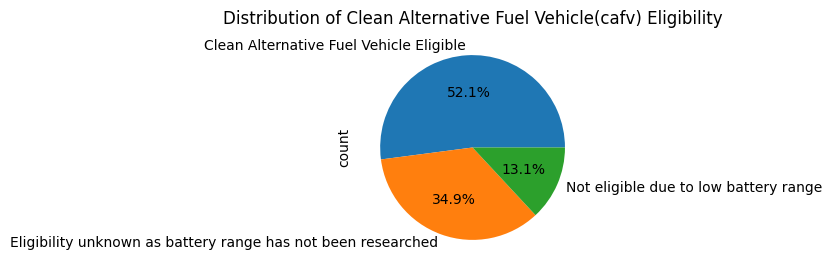

In [60]:
plt.figure(figsize=(6,3))
data['clean_alternative_fuel_vehicle_(cafv)_eligibility'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Clean Alternative Fuel Vehicle(cafv) Eligibility')
plt.show()

Approximately 52% of the vehicles are eligible for Clean Alternative Fuel Vehicle incentives.

Bivariate Analysis

Categorical vs Numerical

1. Electric_range vs Make

In [61]:
make_er_diff = data.groupby('make')['electric_range'].mean().sort_values(ascending=False).head(10)
make_er_diff

make
JAGUAR          218.977064
TESLA           170.465894
POLESTAR        125.639138
CHEVROLET       124.499408
HYUNDAI         109.249467
KIA             107.441262
VOLKSWAGEN      104.607499
RIVIAN          103.000000
LUCID MOTORS    103.000000
GENESIS         103.000000
Name: electric_range, dtype: float64

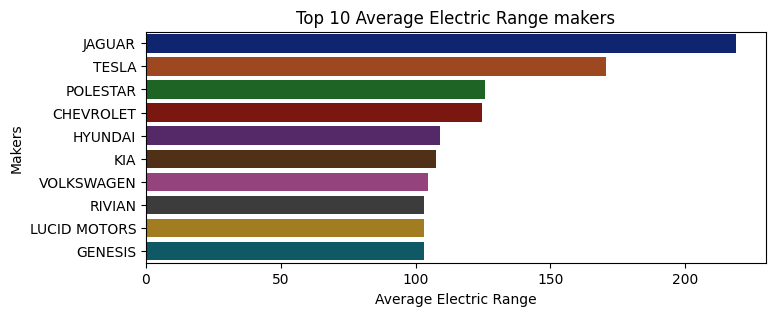

In [62]:
plt.figure(figsize=(8,3))
sns.barplot(x=make_er_diff.values, y=make_er_diff.index, palette='dark')
plt.title("Top 10 Average Electric Range makers")
plt.xlabel("Average Electric Range")
plt.ylabel("Makers")
plt.show()

On an average 'Jaguar' makes the vehicles with highest electric range, followed by 'Tesla' and 'Polestar'. 10th being 'Genesis'

2. Electric Range vs Electric Vehicle Type

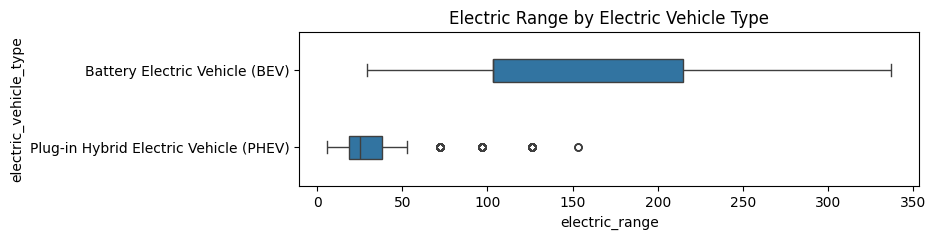

In [63]:
plt.figure(figsize=(8,2))
sns.boxplot(x='electric_range', y='electric_vehicle_type', data=data, width=0.3, fliersize=5)
plt.title('Electric Range by Electric Vehicle Type')
plt.show()

It is evident that on an average or overall, Battery vehicles have more electric range than hybrid vehicles

3. Model Year vs Electric Range

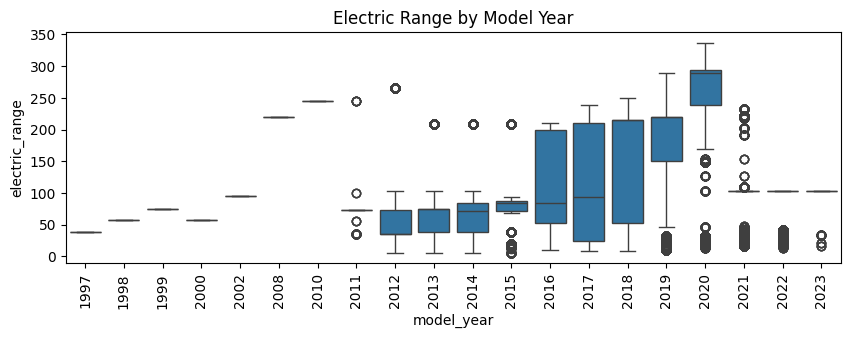

In [64]:
# Boxplot to analyze electric range by model year
plt.figure(figsize=(10,3))
sns.boxplot(x='model_year', y='electric_range', data=data)
plt.title('Electric Range by Model Year')
plt.xticks(rotation=90)
plt.show()

4. Electric Range vs Clean_alternative_fuel_vehicle_(cafv)_eligibility

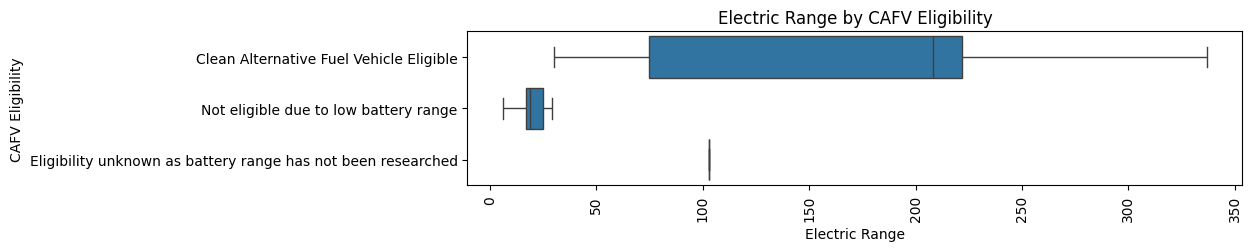

In [65]:
plt.figure(figsize=(10,2))
sns.boxplot(y='clean_alternative_fuel_vehicle_(cafv)_eligibility', x='electric_range', data=data)
plt.title('Electric Range by CAFV Eligibility')
plt.xlabel('Electric Range')
plt.ylabel('CAFV Eligibility')
plt.xticks(rotation=90)
plt.show()

It is clearly observable that, the vehicles eligible for Clean Alternative Fuel incentives is having the varied eletric range, which tells that there has been significant increase in the range for these vehicles, which helps them to get eligible for this incentive.

other two categories clearly shows there is no variablity in electric range at all.

Categorical vs categorical

1. Electric_vehicle_type vs Clean_alternative_fuel_vehicle_(cafv)_eligibility

<Axes: ylabel='electric_vehicle_type'>

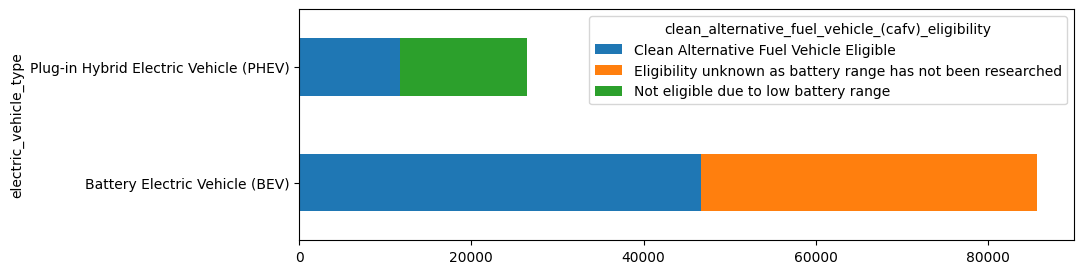

In [66]:

pd.crosstab(data['electric_vehicle_type'], data['clean_alternative_fuel_vehicle_(cafv)_eligibility']).plot(kind='barh', figsize=(10,3), stacked=True)

In [67]:
pd.crosstab(data['electric_vehicle_type'], data['clean_alternative_fuel_vehicle_(cafv)_eligibility'])

clean_alternative_fuel_vehicle_(cafv)_eligibility,Clean Alternative Fuel Vehicle Eligible,Eligibility unknown as battery range has not been researched,Not eligible due to low battery range
electric_vehicle_type,,,
Battery Electric Vehicle (BEV),46626,39097,9
Plug-in Hybrid Electric Vehicle (PHEV),11769,0,14651


1. Both Battery and Hybrid vehicles are eliugible for CAFV incentive. The number is more for Battery vehicles.
2. Hybrid models have more vehicles with low battery.

Make vs Electric Vehicle Type

<Axes: ylabel='make'>

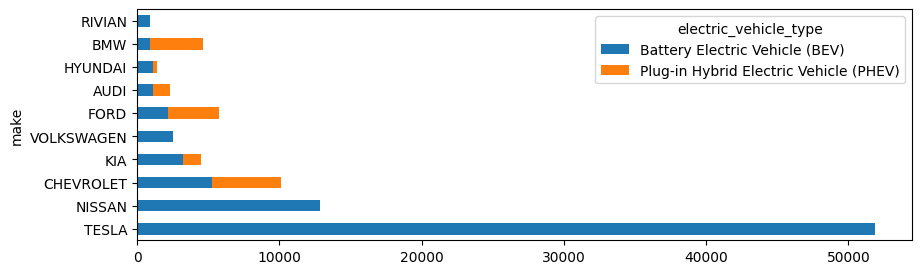

In [68]:
crosstab_result = pd.crosstab(data['make'], data['electric_vehicle_type'])
sorted_crosstab = crosstab_result.sort_values(by=['Battery Electric Vehicle (BEV)', 'Plug-in Hybrid Electric Vehicle (PHEV)'], ascending=False)[:10].plot(kind='barh', figsize=(10,3), stacked=True)
sorted_crosstab

Tesla has more no Hybrid vehicles at all. It is serving it's purpose well.


County vs Electric Vehicle Type

<Axes: ylabel='county'>

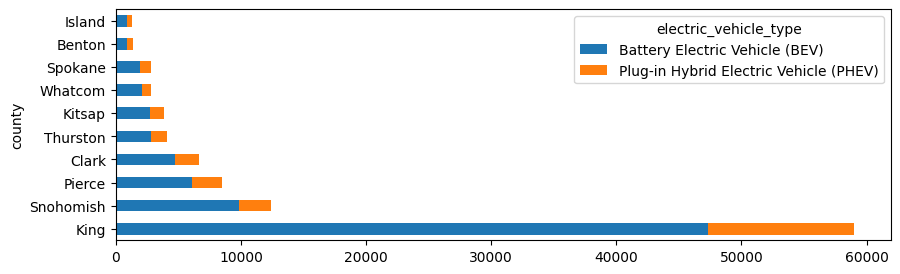

In [69]:
crosstab = pd.crosstab(data['county'], data['electric_vehicle_type'])
crosstab.sort_values(by=crosstab.columns.tolist(), ascending=False).head(10).plot(kind='barh', figsize=(10,3), stacked=True)

Average Electric Range for top 10 counties

In [70]:
top10_counties_avg_er = data.groupby('county')['electric_range'].mean().sort_values(ascending=False).head(10)
top10_counties_avg_er

county
Ferry        144.037037
Columbia     139.538462
Chelan       132.944954
Kittitas     131.028061
Wahkiakum    129.461538
King         129.369549
Snohomish    123.978327
Klickitat    122.942857
Adams        122.676471
Okanogan     121.536913
Name: electric_range, dtype: float64

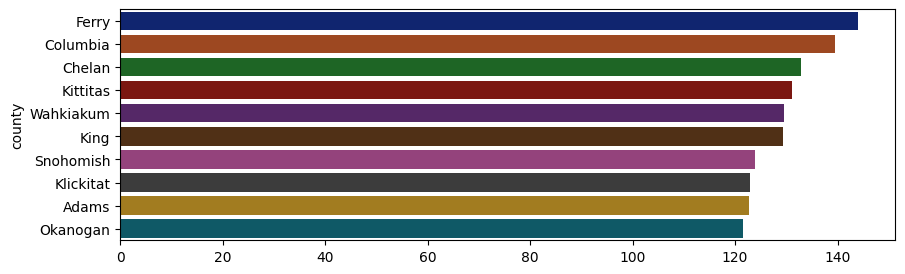

In [71]:
plt.figure(figsize=(10,3))
sns.barplot(x=top10_counties_avg_er.values, y=top10_counties_avg_er.index, palette='dark')
plt.show()

## Task 2: Create a Choropleth using plotly.express to display the number of EV vehicles based on location

In [72]:
data = data.rename(columns={'latitude' : 'longitude',
                     'longitude' : 'latitude'})

In [73]:
import plotly.express as px

In [74]:
data['ev_count'] = data.groupby(['state','postal_code','county','latitude', 'longitude'])['postal_code'].transform('count')

In [75]:
location_data_df = data.groupby(['state', 'postal_code', 'county', 'latitude', 'longitude']).size().reset_index(name='ev_count')
location_data_df

,state,postal_code,county,latitude,longitude,ev_count
0,WA,98001,King,47.3074,-122.23035,465
1,WA,98002,King,47.28317,-122.21698,165
2,WA,98003,King,47.30151,-122.3303,312
3,WA,98004,King,47.61001,-122.1872,2001
4,WA,98005,King,47.64441,-122.1621,829
...,...,...,...,...,...,...
551,WA,99360,Walla Walla,46.04238,-118.66919,4
552,WA,99361,Walla Walla,46.27013,-118.15448,8
553,WA,99362,Walla Walla,46.07068,-118.34261,248
554,WA,99402,Asotin,46.34056,-117.04784,9


In [76]:
import plotly.express as px

In [77]:

fig = px.scatter_geo(location_data_df,
                     lat='latitude',
                     lon='longitude',
                     color='ev_count', 
                     hover_name='county', 
                     hover_data=['postal_code', 'ev_count'],
                     size='ev_count',
                     title="Number of Electric Vehicles by Location",
                     color_continuous_scale='Viridis',
                     scope='usa')

fig.show()